<a href="https://colab.research.google.com/github/reban87/ML-Projects/blob/main/ANN_Exercise_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Exercise - Artificial Neural Networks
In this notebook you will build and train an ANN to recognize handwitten numbers using Keras.

In [ ]:
# import some default libaries
import numpy as np
import matplotlib.pyplot as plt

# Data preparation
In this exercise, you would need to build a neural network for handwritten digit recognition. The well known [MNIST ](http://yann.lecun.com/exdb/mnist/)dataset consists of 70,000 images of handwritten numbers. The challenge is to train a neural network that labels each image with the correct number. To train the neural network 60,000 images are used. The remaining 10,000 images are used to validate the performance of the neural network.

The dataset is available through Keras Datasets. We download and prepare the data. First, inputs need to be flattened and scaled, since neural networks work better with scaled data between 0 and 1. Second, the labels need to be one-hot encoded.

### Load the data

In [ ]:
from tensorflow.keras.datasets import mnist
 
# load data
(x_train, y_train), (x_val, y_val) = mnist.load_data()
 
# scale data
x_train, x_val = x_train / 255.0, x_val / 255.0
 
# inspect shape and type
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_val.dtype, y_train.dtype

### Inspect the data

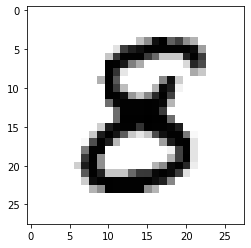

In [ ]:
# plot a sample point
plt.imshow(x_train[3601], cmap='binary')

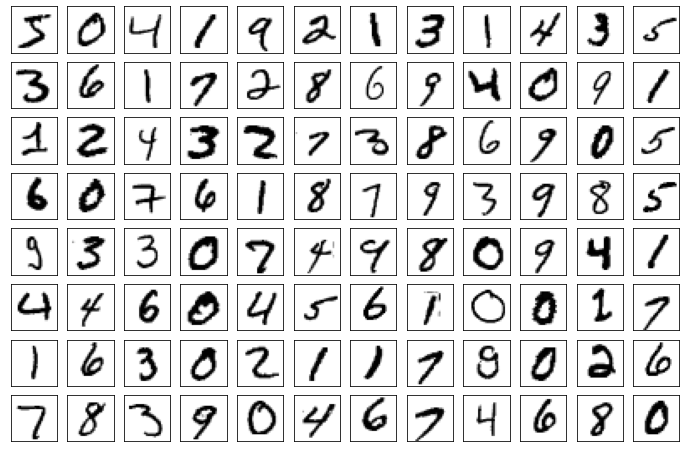

In [ ]:
# plot first few numbers
nrows, ncols = 8, 12
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols, nrows))
axs = axs.ravel() 
for i in range(nrows*ncols):
    axs[i].imshow(x_train[i], cmap='binary')
    axs[i].set(xticks=[], yticks=[])

### Reshape a square image to a vector

In [ ]:
# reformat data from 2D image to 1D vector in the form (batch_size, input_vector_size)
print("Change X array from shape {} ... ".format(x_train.shape))
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1]*x_val.shape[2])
print("to shape {}".format(x_train.shape))

Change X array from shape (60000, 28, 28) ... 
to shape (60000, 784)


### One-Encode Labels
<div align="center">
<a><img src="https://drive.google.com/uc?id=1TZWumlT60fwqoQYLJ-OD6e4-k_pymBep" width="400"></a>
</div>

In [ ]:
# reformat target vector from categorical label to one-hot-encoding
from tensorflow.keras import utils

# reformat labels to one-hot-encoded labels
print('Before y_train[0] = {}'.format(y_train[0]))
y_train = utils.to_categorical(y_train, 10)
y_val = utils.to_categorical(y_val, 10)
print('After y_train[0] = {}'.format(y_train[0]))

Before y_train[0] = 5
After y_train[0] = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Build a neural network
A neural network can be built in two steps. First, the topology of the neural network is defined. This contains o.a. the number of layers, number of nodes (neurons) per layer, and activation function type. Next, a loss function and optimization function need to be defined. Use [Keras](https://keras.io) for programming the neural network.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# define model topology
model = models.Sequential()
# ReLU (Rectified Linear Unit) activation function
model.add(layers.Dense(40, activation='relu', input_shape=(784,)))
model.add(layers.Dense(20, activation='relu'))
#https://keras.io/api/layers/activation_layers/ 
model.add(layers.Dense(10, activation='softmax'))

# define model optimization method
model.compile(optimizer=optimizers.Adam(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['categorical_accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# Train neural network

In [ ]:
# train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=60, validation_data=(x_val, y_val))

Epoch 1/20
1000/1000 [==============================] - 3s 2ms/step - loss: 0.4059 - categorical_accuracy: 0.8814 - val_loss: 0.2137 - val_categorical_accuracy: 0.9359
Epoch 2/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1802 - categorical_accuracy: 0.9477 - val_loss: 0.1569 - val_categorical_accuracy: 0.9548
Epoch 3/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1430 - categorical_accuracy: 0.9578 - val_loss: 0.1438 - val_categorical_accuracy: 0.9584
Epoch 4/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1212 - categorical_accuracy: 0.9645 - val_loss: 0.1341 - val_categorical_accuracy: 0.9601
Epoch 5/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1066 - categorical_accuracy: 0.9686 - val_loss: 0.1223 - val_categorical_accuracy: 0.9629
Epoch 6/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0947 - categorical_accuracy: 0.9719 - val_loss: 0.1145 - val_categorical_accuracy:

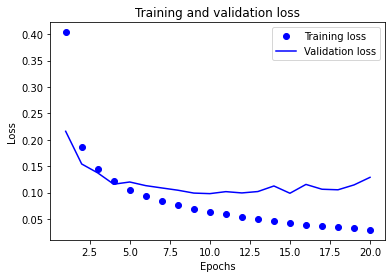

In [ ]:
# plot training loss history
history_dict = history.history
loss_values  = history_dict['loss']
val_loss_values  = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

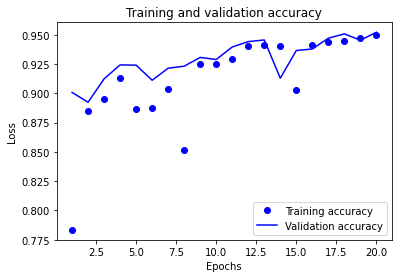

In [ ]:
# plot training accuracy history
history_dict = history.history
loss_values  = history_dict['categorical_accuracy']
val_loss_values  = history_dict['val_categorical_accuracy']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

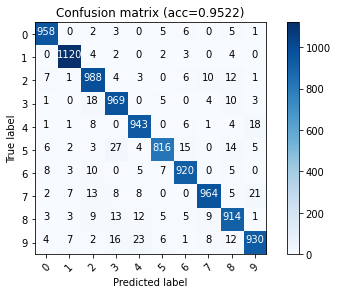

In [ ]:
# Evaluate performance of model by plotting confusion matrix
from sklearn.metrics import confusion_matrix

# see http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools

def accuracy(y, y_pred):
    return np.sum(y==y_pred)/len(y)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    
    

    

# predict labels from validation set
y_pred = model.predict(x_val)

# convert data to label number
y_pred = np.argmax(y_pred, axis=1) 
y_true = np.argmax(y_val, axis=1) 

# compute the confusion matrix
cm = confusion_matrix(y_true, y_pred) 

# plot the confusion matrix
plot_confusion_matrix(cm, 
                      title='Confusion matrix (acc={})'.format(accuracy(y_true, y_pred)), 
                      classes = range(10))